# SPACESHIP TITANIC DATASET (KAGGLE COMPETITION)

## Problem Statement:
**In this project, our goal was to build a predictive model to determine whether passengers will be transported to a distant planet. The task is a binary classification problem, where we aim to predict if a passenger will be "Transported" or "Not Transported."**

## 1. Importing Lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings 
warnings.filterwarnings('ignore')

##  2. Loading dataset 

In [2]:
train = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\train.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.tail(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [5]:
train.shape

(8693, 14)

In [6]:
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


## Handling NaN Values in the Dataset

In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
#Fill NaN values with 0 for numerical columns
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train[numerical_columns] = train[numerical_columns].fillna(0)

#Fill numerical columns with mean values
train[numerical_columns] = train[numerical_columns].replace(0, train[numerical_columns].mean())

In [9]:
#Fill NaN values with the mode for categorical columns
categorical_columns = ['HomePlanet', 'Cabin', 'Destination']
for column in categorical_columns:
    mode_value = train[column].mode().iloc[0]  # Get the mode (most common category)
    train[column] = train[column].fillna(mode_value)

In [10]:
#Fill NaN values with the mode for categorical columns
categorical_columns = ['CryoSleep', 'VIP']
for column in categorical_columns:
    mode_value = train[column].mode().iloc[0]  # Get the mode (most common category)
    train[column] = train[column].fillna(mode_value)

In [11]:
# Fill missing values in the "Name" column with "Unknown"
train['Name'] = train['Name'].fillna("Unknown")

# Now the missing values in the "Name" column are filled with "Unknown."

# Check if there are any remaining missing values:
print(train.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [12]:
train.isnull()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## "Converting Columns to Integer Data Type"

In [13]:
col = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [14]:
train[col] =train[col].astype(int)

In [15]:
train['Age'].describe()

count    8693.000000
mean       29.384217
std        13.722551
min         1.000000
25%        20.000000
50%        28.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

# "Feature Engineering" 

In [16]:
# Creating a new categorical column "Age category"
age_bins = [0, 30, 60, 100 ]
age_labels = ['Young', 'Mid', 'Old']
train['AgeCategory'] = pd.cut(train['Age'], bins=age_bins , labels=age_labels, right=False)
print(train[['AgeCategory','Age']].head(10))

  AgeCategory  Age
0         Mid   39
1       Young   24
2         Mid   58
3         Mid   33
4       Young   16
5         Mid   44
6       Young   26
7       Young   28
8         Mid   35
9       Young   14


In [17]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'AgeCategory'],
      dtype='object')

In [18]:
# Now we are creating column "TotalSpending"
# calculating the total spending for each passenger

train['TotalSpending'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [19]:
train['TotalSpending'].head()

0     1439
1      736
2    10552
3     5396
4     1091
Name: TotalSpending, dtype: int32

# Exploratory Data Analysis 

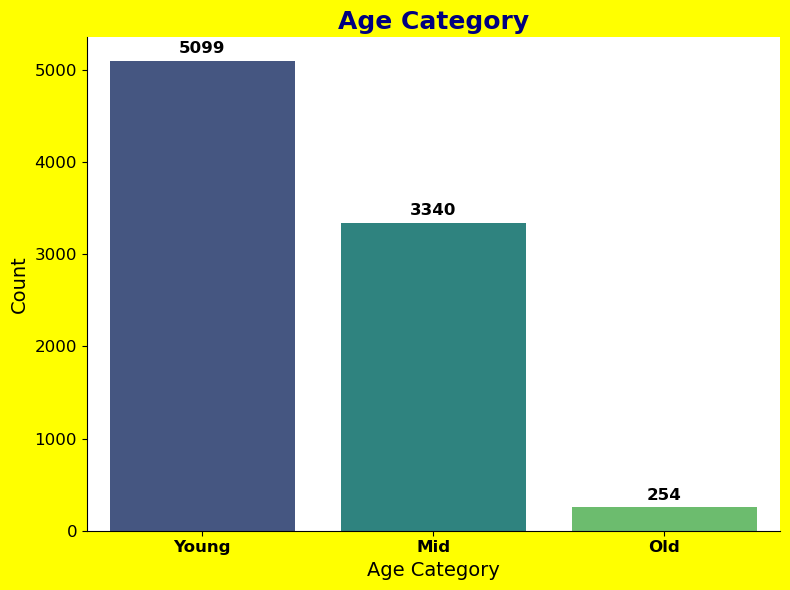

In [20]:
plt.figure(figsize=(8, 6),facecolor='Yellow')
sns.countplot(data=train, x='AgeCategory', palette='viridis', alpha=1)
plt.title('Age Category', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Count', fontsize=14)


for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold')  
plt.yticks(fontsize=12)
sns.despine()  
plt.tight_layout()  
plt.show()

**"Age Distribution: Younger passengers (below 30) dominate the dataset, followed by mid-age travelers, while the number of older passengers (above 60) is relatively smaller."**

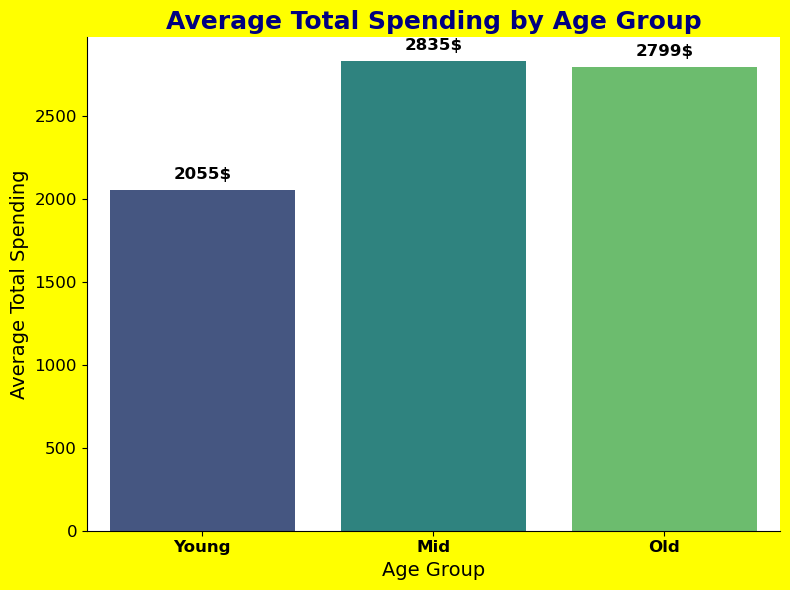

In [21]:

avg_spending = train.groupby('AgeCategory')['TotalSpending'].mean().reset_index()

# create a bar plot for avg totalspending by age group

plt.figure(figsize=(8,6),facecolor='yellow')
sns.barplot(data=avg_spending, x='AgeCategory', y='TotalSpending', palette = 'viridis')
plt.title('Average Total Spending by Age Group',  fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Total Spending', fontsize=14)

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 50, f'{int(height)}$', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12)
sns.despine()  
plt.tight_layout()  
plt.show()

**"Average Spending Analysis: Interestingly, mid and old-age passengers tend to have higher average spending compared to younger travelers."**

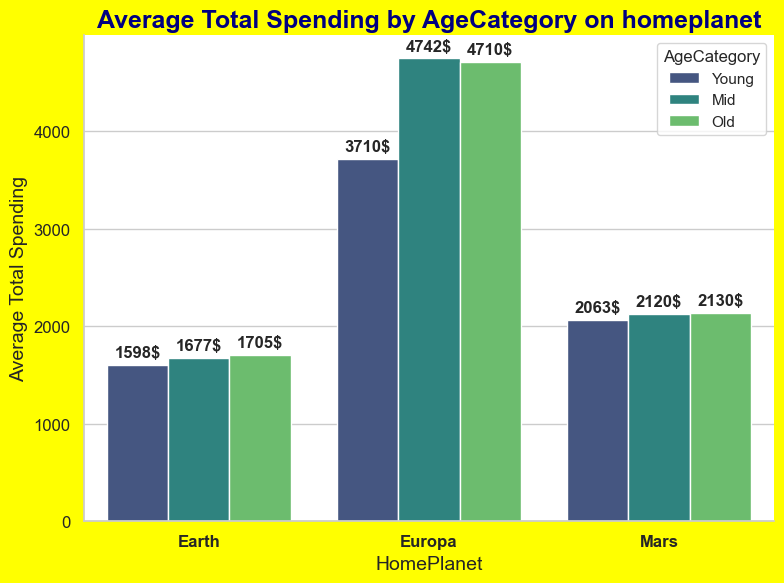

In [22]:
sns.set(style="whitegrid")
# Calculate the average total spending by 'HomePlanet' and 'AgeCategory'
avg_spending_by_planet_age = train.groupby(['HomePlanet', 'AgeCategory'])['TotalSpending'].mean().reset_index()

plt.figure(figsize=(8, 6), facecolor = 'yellow')
sns.barplot(data=avg_spending_by_planet_age, x='HomePlanet', y='TotalSpending', hue = 'AgeCategory', palette='viridis')
plt.title('Average Total Spending by AgeCategory on homeplanet',fontsize=18, fontweight='bold', color='navy')
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Average Total Spending', fontsize=14)

# Adding text annotations for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 50, f'{int(height)}$', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12, fontweight='bold')  
plt.yticks(fontsize=12)
sns.despine()  
plt.tight_layout()  
plt.show()

**"Homeplanet Spending Analysis: Passengers from EUROPA planet exhibit higher average total spending compared to Earth and Mars, highlighting their propensity for increased onboard expenditures."**

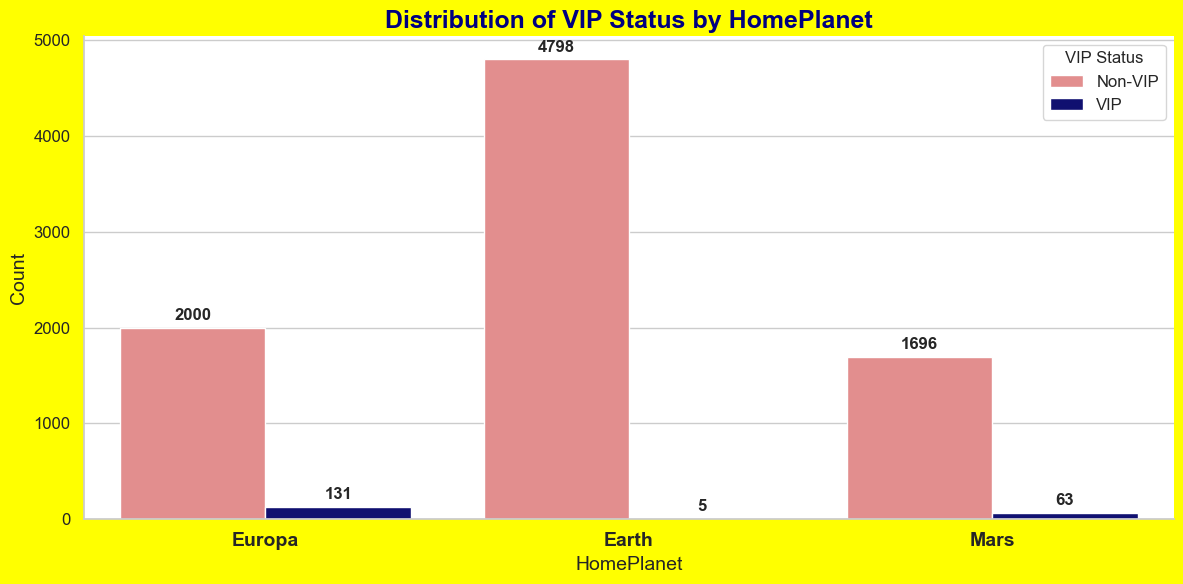

In [23]:
# Plotting style
sns.set(style="whitegrid")

# Create the countplot for VIP status by HomePlanet
plt.figure(figsize=(12, 6), facecolor='yellow')
ax = sns.countplot(data=train, x='HomePlanet', hue='VIP', palette=['lightcoral', 'navy'])
plt.title('Distribution of VIP Status by HomePlanet', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='VIP Status', title_fontsize=12, fontsize=12, loc='upper right', labels=['Non-VIP', 'VIP'])
plt.tight_layout()

# Adding text annotations for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(fontsize=14, fontweight='bold')  
plt.yticks(fontsize=12)
sns.despine()  
plt.tight_layout()  
plt.show()

**"Homeplanet VIP Status Distribution: EUROPA shows a higher concentration of VIP passengers, while EARTH has a larger proportion of non-VIP passengers."**

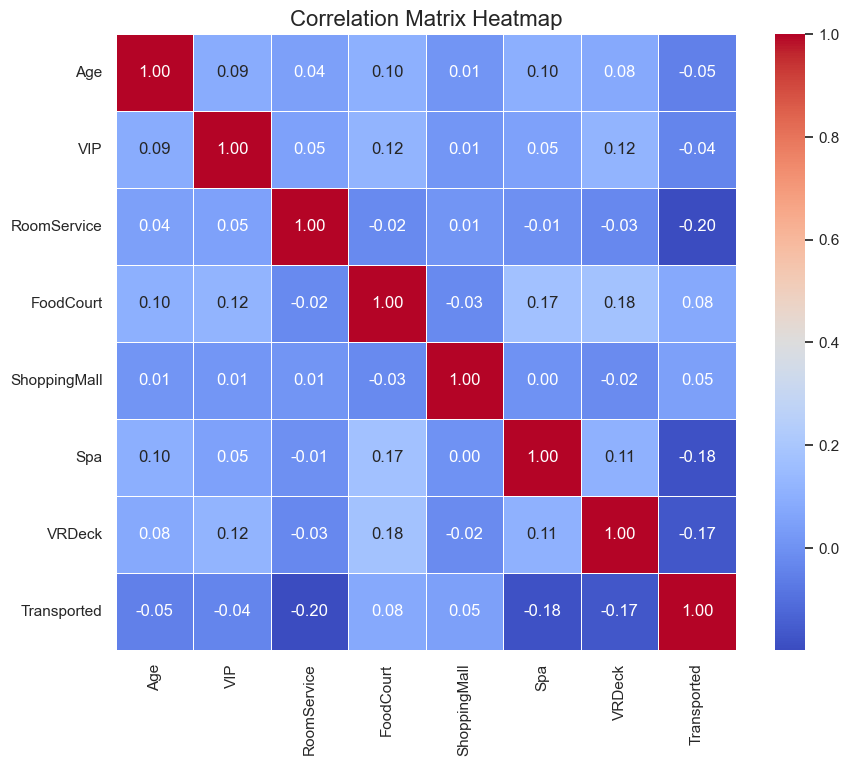

In [24]:
selected_columns = ['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']

# Create a subset of the data with the selected columns
correlation_data = train[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

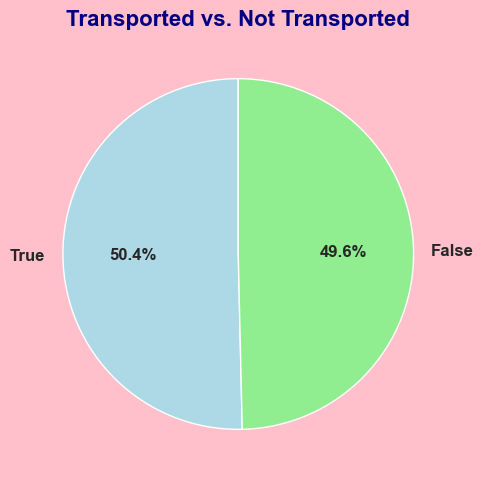

In [25]:
# Count the number of transported and not transported passengers
transported_count = train['Transported'].value_counts()

# Create a slice pie chart for 'Transported'
plt.figure(figsize=(5, 5), facecolor='pink')
colors = ['lightblue', 'lightgreen']
plt.pie(transported_count, labels=transported_count.index, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Transported vs. Not Transported', fontsize=16, color='navy', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.tight_layout()
plt.show()

# "Outlier Detection and Cleaning"

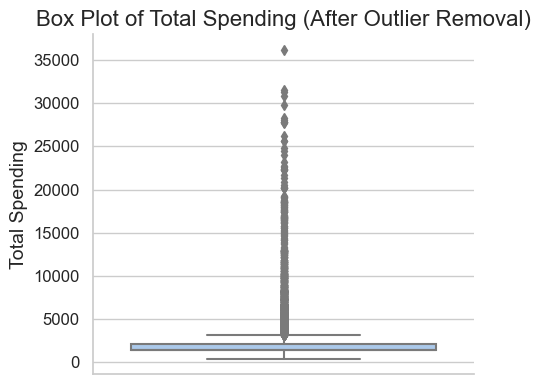

In [26]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=train, y='TotalSpending', palette='pastel')
plt.title('Box Plot of Total Spending (After Outlier Removal)', fontsize=16)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [27]:
Q1 = train['TotalSpending'].quantile(0.25)
Q3 = train['TotalSpending'].quantile(0.75)

IQR = Q3 - Q1

# lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outlier values with lower or upper bound
train['TotalSpending'] = train['TotalSpending'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x) )

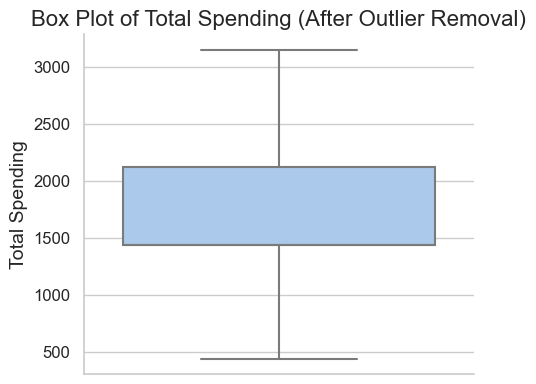

In [28]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=train, y='TotalSpending', palette='pastel')
plt.title('Box Plot of Total Spending (After Outlier Removal)', fontsize=16)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

## Dropping Irrelevant columns

In [29]:
columns_to_drop = ['RoomService','ShoppingMall','ShoppingMall','VRDeck','AgeCategory','Name','FoodCourt','Spa']  # List of columns to drop

# Drop the irrelevant columns
train = train.drop(columns=columns_to_drop)

In [30]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,TotalSpending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,False,1439.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,False,3146.5
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,False,3146.5
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,True,1091.0


 ## "One-Hot Encoding: Converting Categorical Features into Numerical Format using One-Hot Encoding."

In [31]:
# Performming one-hot encoding for 'HomePlanet' and 'Destination'
train = pd.get_dummies(train, columns=['HomePlanet', 'Destination'], drop_first=True)

# Extracting relevant information from 'Cabin' and create new features
train['Deck'] = train['Cabin'].str.split('/').str[0]
train['CabinNumber'] = train['Cabin'].str.split('/').str[1].str[:-2].replace('', -1).astype(int)
train['Side'] = train['Cabin'].str[-1]

# Drop the original 'Cabin' column
train = train.drop(columns=['Cabin'])

In [32]:
# Replace -1 with 0 in the 'CabinNumber' column
train['CabinNumber'] = train['CabinNumber'].replace(-1, 0)

# Calculate the mode of the 'CabinNumber' column
cabin_number_mode = train['CabinNumber'].mode().iloc[0]

# Replace 0 with the mode value
train['CabinNumber'] = train['CabinNumber'].replace(0, cabin_number_mode)

In [33]:
train.head()

,PassengerId,CryoSleep,Age,VIP,Transported,TotalSpending,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,CabinNumber,Side
0,0001_01,False,39,False,False,1439.0,1,0,0,1,B,0,P
1,0002_01,False,24,False,True,736.0,0,0,0,1,F,0,S
2,0003_01,False,58,True,False,3146.5,1,0,0,1,A,0,S
3,0003_02,False,33,False,False,3146.5,1,0,0,1,A,0,S
4,0004_01,False,16,False,True,1091.0,0,0,0,1,F,0,S


In [34]:
train[['CryoSleep', 'VIP', 'Transported']] = train[['CryoSleep', 'VIP', 'Transported']].astype(int)

In [35]:
train.head()

,PassengerId,CryoSleep,Age,VIP,Transported,TotalSpending,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,CabinNumber,Side
0,0001_01,0,39,0,0,1439.0,1,0,0,1,B,0,P
1,0002_01,0,24,0,1,736.0,0,0,0,1,F,0,S
2,0003_01,0,58,1,0,3146.5,1,0,0,1,A,0,S
3,0003_02,0,33,0,0,3146.5,1,0,0,1,A,0,S
4,0004_01,0,16,0,1,1091.0,0,0,0,1,F,0,S


In [36]:
train = pd.get_dummies(train, columns=['Deck'], prefix='Deck')

In [37]:
train = pd.get_dummies(train, columns=[ 'Side'], prefix=['Side'])

# Splitting the Dataset

In [38]:
X = train.drop(['Transported'],axis = 1)
y = train['Transported']

In [39]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Model

## I have Chosen Random Forest

In [40]:
# Create and train the Random Forest classifier with regularization
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [41]:
# Predict using the trained model
y_pred = rf_model.predict(X_test)

In [42]:
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.745398773006135


In [49]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.745398773006135
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      1289
           1       0.80      0.67      0.73      1319

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.74      2608
weighted avg       0.75      0.75      0.74      2608

Confusion Matrix:
[[1065  224]
 [ 440  879]]


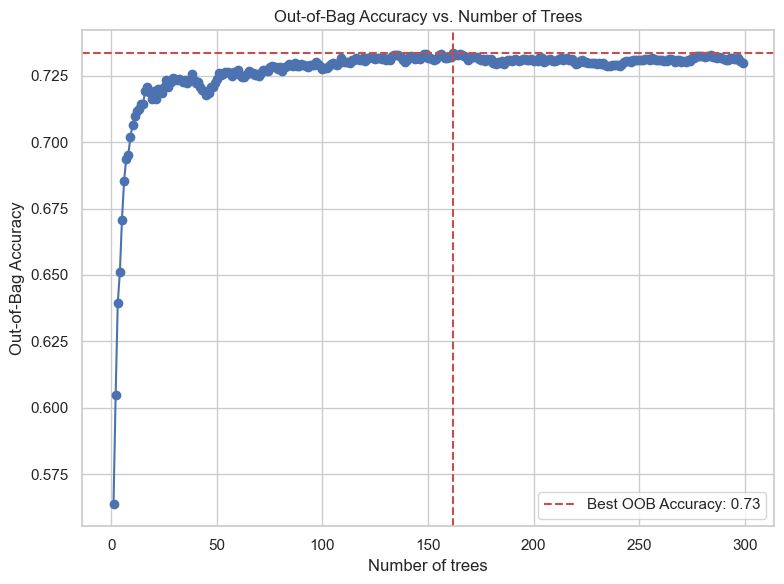

In [83]:
# Create an empty list to store OOB accuracies for different numbers of trees
oob_accuracies = []

# Try different values of n_estimators (number of trees)
for n_trees in range(1, 300):
    # Create the Random Forest classifier with the current number of trees
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42, oob_score=True)
    
    # Train the classifier on your training data
    rf_model.fit(X_train, y_train)
    
    # Append the OOB accuracy to the list
    oob_accuracies.append(rf_model.oob_score_)

# Find the index of the maximum OOB accuracy and the corresponding number of trees
best_accuracy_index = np.argmax(oob_accuracies)
best_accuracy = oob_accuracies[best_accuracy_index]
best_num_trees = best_accuracy_index + 1

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 300), oob_accuracies, marker='o', linestyle='-', color='b')
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f"Best OOB Accuracy: {best_accuracy:.2f}")
plt.axvline(x=best_num_trees, color='r', linestyle='--')
plt.xlabel("Number of trees")
plt.ylabel("Out-of-Bag Accuracy")
plt.title("Out-of-Bag Accuracy vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 **"Predictive: Achieving a commendable test accuracy of 74% alongside an OOB accuracy of 73% showcases the model's prowess in capturing complex patterns and making reliable predictions."**

# ==============================================================================================================================

## Testing on test dataset

In [43]:
test_data = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\test.csv")

In [51]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [52]:
test_data.shape

(4277, 13)

# Preprocessing data

In [53]:
# Replace NaN values with zero
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)
# Convert boolean to 1's and 0's
test_data['VIP'] = test_data['VIP'].astype(int)
# Assuming you want to impute missing values with the median age
median_age = test_data['Age'].median()
test_data['Age'].fillna(median_age, inplace=True)
test_data['Age'] = test_data['Age'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)

In [54]:
test_data['TotalSpending'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']
columns_to_drop = ['RoomService','ShoppingMall','VRDeck','Name','FoodCourt','Spa']  # List of columns to drop

# Drop the irrelevant columns
test_data = test_data.drop(columns=columns_to_drop)

In [55]:
test_data.isnull().sum()

PassengerId        0
HomePlanet        87
CryoSleep          0
Cabin            100
Destination       92
Age                0
VIP                0
TotalSpending    455
dtype: int64

In [56]:
# Check for columns with NaN values in 'test_data'
columns_with_nan = test_data.columns[test_data.isnull().any()].tolist()

# Remove rows with NaN values from specific columns in the 'test_data' DataFrame
test_data = test_data.dropna(subset=columns_with_nan)

# Now the 'test_data' DataFrame will not contain any rows with NaN values in the specified columns

In [57]:
# Extract relevant information from 'Cabin' and create new features
test_data['Deck'] = test_data['Cabin'].str.split('/').str[0]
test_data['CabinNumber'] = test_data['Cabin'].str.split('/').str[1].str[:-2].replace('', -1).astype(int)
test_data['Side'] = test_data['Cabin'].str[-1]

# Drop the original 'Cabin' column
test_data = test_data.drop(columns=['Cabin'])

In [58]:
# Perform one-hot encoding for the 'Deck' column
test_data = pd.get_dummies(test_data, columns=['Deck'], prefix='Deck')

In [59]:
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination'], drop_first=True)

In [66]:
test_data = pd.get_dummies(test_data, columns=[ 'Side'], prefix=['Side'])

In [62]:
# Replace -1 with 0 in the 'CabinNumber' column
test_data['CabinNumber'] = test_data['CabinNumber'].replace(-1, 0)

# Calculate the mode of the 'CabinNumber' column
cabin_number_mode = test_data['CabinNumber'].mode().iloc[0]

# Replace 0 with the mode value
test_data['CabinNumber'] = test_data['CabinNumber'].replace(0, cabin_number_mode)

In [67]:
test_data.head()

,PassengerId,CryoSleep,Age,VIP,TotalSpending,CabinNumber,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
0,0013_01,1,27,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0018_01,0,19,0,2832.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0019_01,1,31,0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0021_01,0,38,0,7418.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
4,0023_01,0,20,0,645.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [69]:
X_test = test_data  
y_pred = rf_model.predict(X_test)

result_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': y_pred})

## prediction

In [80]:
result_df.head(10)

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,1
5,0027_01,0
7,0032_01,1
8,0032_02,1
9,0033_01,1
10,0037_01,1


In [79]:
# Save the predictions to a CSV file
result_df.to_csv('predictions.csv', index=False)

# Conclusion

**In conclusion, this project demonstrates the successful implementation of a Random Forest classifier to predict whether passengers will be transported to a distant planet. I hope my approach and methodology provide valuable insights into solving binary classification tasks in future projects.**

